# Xarray with Dask Arrays

<img src="images/dataset-diagram-logo.png" 
     align="right"
     width="66%"
     alt="Xarray Dataset">
     
**[Xarray](http://xarray.pydata.org/en/stable/)** is an open source project and Python package that extends the labeled data functionality of [Pandas](https://pandas.pydata.org/) to N-dimensional array-like datasets. It shares a similar API to [NumPy](http://www.numpy.org/) and [Pandas](https://pandas.pydata.org/) and supports both [Dask](https://dask.org/) and [NumPy](http://www.numpy.org/) arrays under the hood.

In [1]:
%matplotlib inline

from dask.distributed import Client
import xarray as xr

## Start Dask Client for Dashboard

Starting the Dask Client is optional.  It will provide a dashboard which 
is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [ ]:
client = Client(n_workers=2, threads_per_worker=2, memory_limit='8GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34655,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:35533,Total threads: 2
Dashboard: http://127.0.0.1:36209/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:42955,


2025-07-02 16:46:13,856 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70d0a0>
2025-07-02 16:46:13,858 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70d130>
2025-07-02 16:46:13,859 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70d5e0>
2025-07-02 16:46:14,218 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70d1f0>
2025-07-02 16:46:14,219 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22d3a3c50>
2025-07-02 16:46:14,221 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22d3a3d10>
2025-07-02 16:46:14,222 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70e2d0>
2025-07-02 16:46:14,224 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c70e420>
2025-07-02 16:46:14,226 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 25)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 25): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 51)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 51): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 77)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 77): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 103)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb236

2025-07-02 16:46:29,361 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c69cd0>
2025-07-02 16:46:29,363 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c68f20>
2025-07-02 16:46:29,365 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c69e80>
2025-07-02 16:46:29,367 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c6a240>
2025-07-02 16:46:29,369 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c6a3c0>
2025-07-02 16:46:29,372 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216d24d10>
2025-07-02 16:46:29,374 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c6af90>
2025-07-02 16:46:29,375 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c6aed0>
2025-07-02 16:46:29,376 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 87)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 87): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 29)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 29): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 139)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 139): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 81)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23

2025-07-02 16:46:29,564 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cadc70>
2025-07-02 16:46:29,565 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216caed80>
2025-07-02 16:46:29,570 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cae3c0>
2025-07-02 16:46:29,572 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cadbe0>
2025-07-02 16:46:29,574 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cadf70>
2025-07-02 16:46:29,576 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cade80>
2025-07-02 16:46:29,578 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cad460>
2025-07-02 16:46:29,580 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216cad370>
2025-07-02 16:46:29,582 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 15)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 15): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 125)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 125): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 67)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 67): 'invert-8f03c6a0096ba1d918a5366a2e362bf7'
Missing data_id for ('rechunk-split-680e3479767dcb23634fc35f34df55e5', 119)(.., obj=..): 'invert-8f03c6a0096ba1d918a5366a2e362bf7.return_value'
Missing informant_id for ('rechunk-split-680e3479767dcb2

2025-07-02 16:46:29,771 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c1d760>
2025-07-02 16:46:29,773 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216d24aa0>
2025-07-02 16:46:29,774 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216b04cb0>
2025-07-02 16:46:29,776 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216b04230>
2025-07-02 16:46:29,777 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21729d8e0>
2025-07-02 16:46:29,781 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c1df10>
2025-07-02 16:46:29,782 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c1d2e0>
2025-07-02 16:46:29,784 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c1e630>
2025-07-02 16:46:29,786 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 2)(.., arrays=..): 'sum-7504d9e4481d121ffd48babb55dba9b5.return_value'
Missing informant_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 2): 'sum-7504d9e4481d121ffd48babb55dba9b5'
Missing data_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 1)(.., arrays=..): 'sum-7504d9e4481d121ffd48babb55dba9b5.return_value'
Missing informant_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 1): 'sum-7504d9e4481d121ffd48babb55dba9b5'
Missing data_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 0)(.., arrays=..): 'sum-7504d9e4481d121ffd48babb55dba9b5.return_value'
Missing informant_id for ('sum-aggregate-5bc9291585186db5860660df29d7cdc7', 0, 0, 0): 'sum-7504d9e4481d121ffd48babb55dba9b5'


2025-07-02 16:46:30,959 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a1ac60>
2025-07-02 16:46:30,961 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a73bc0>
2025-07-02 16:46:30,963 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216bfad80>
2025-07-02 16:46:30,965 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a880e0>
2025-07-02 16:46:30,966 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a8a4b0>
2025-07-02 16:46:30,968 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a8b680>
2025-07-02 16:46:30,970 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a8bda0>
2025-07-02 16:46:30,972 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216bc82c0>
2025-07-02 16:46:30,975 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 5, 12, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 5, 9, 0) generated an

2025-07-02 16:46:31,279 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae0d10>
2025-07-02 16:46:31,281 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ba81d0>
2025-07-02 16:46:31,285 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae1610>
2025-07-02 16:46:31,288 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae2de0>
2025-07-02 16:46:31,340 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae2bd0>
2025-07-02 16:46:31,341 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae2ae0>
2025-07-02 16:46:31,355 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae3050>
2025-07-02 16:46:31,357 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae3650>
2025-07-02 16:46:31,405 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 3, 12, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 0, 12, 0) generated a

2025-07-02 16:46:31,453 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216d252b0>
2025-07-02 16:46:31,455 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae3290>
2025-07-02 16:46:31,461 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae0f50>
2025-07-02 16:46:31,462 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae38c0>
2025-07-02 16:46:31,504 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690e0c0>
2025-07-02 16:46:31,507 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae29c0>
2025-07-02 16:46:31,531 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690dd60>
2025-07-02 16:46:31,533 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690e630>
2025-07-02 16:46:31,566 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 6)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 6)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 6): 'transpose-7773308c365b174b2c2e20c78e0225c4_5_6_0'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 5)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 5)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 5, 5): 'transpose-7773308c365b174b2c2e20c78e0225c4_5_6_0'
Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 5, 4, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/m

2025-07-02 16:46:31,691 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690c1d0>
2025-07-02 16:46:31,693 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690c3b0>
2025-07-02 16:46:31,717 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690d4c0>
2025-07-02 16:46:31,719 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a8bdd0>
2025-07-02 16:46:31,746 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169345c0>
2025-07-02 16:46:31,748 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216934650>
2025-07-02 16:46:31,759 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216aa3dd0>
2025-07-02 16:46:31,761 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ae2360>
2025-07-02 16:46:31,798 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 4, 9, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32

2025-07-02 16:46:31,886 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216934b00>
2025-07-02 16:46:31,889 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216934fe0>
2025-07-02 16:46:31,902 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216aa2750>
2025-07-02 16:46:31,904 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169359a0>
2025-07-02 16:46:31,909 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216935c40>
2025-07-02 16:46:31,910 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216980530>
2025-07-02 16:46:31,945 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216937380>
2025-07-02 16:46:31,947 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169348c0>
2025-07-02 16:46:31,959 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 4)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 4)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 4): 'transpose-7773308c365b174b2c2e20c78e0225c4_4_2_0'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 3)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 3)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 3): 'transpose-7773308c365b174b2c2e20c78e0225c4_4_2_0'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 4, 2)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for

2025-07-02 16:46:32,118 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216982cf0>
2025-07-02 16:46:32,120 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216982c90>
2025-07-02 16:46:32,173 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a72060>
2025-07-02 16:46:32,175 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216982ba0>
2025-07-02 16:46:32,184 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690f4a0>
2025-07-02 16:46:32,186 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216937b90>
2025-07-02 16:46:32,220 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216983200>
2025-07-02 16:46:32,222 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169835f0>
2025-07-02 16:46:32,247 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 3, 7, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32

2025-07-02 16:46:32,303 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690cda0>
2025-07-02 16:46:32,305 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a1ab40>
2025-07-02 16:46:32,311 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c81b50>
2025-07-02 16:46:32,312 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c824e0>
2025-07-02 16:46:32,376 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c808c0>
2025-07-02 16:46:32,380 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c82840>
2025-07-02 16:46:32,391 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216982de0>
2025-07-02 16:46:32,393 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216936ab0>
2025-07-02 16:46:32,405 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 11)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 11)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 11): 'transpose-7773308c365b174b2c2e20c78e0225c4_3_10_0'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 10)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 10)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 3, 10): 'transpose-7773308c365b174b2c2e20c78e0225c4_3_10_0'
Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 3, 1, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/univ

2025-07-02 16:46:32,508 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216a71640>
2025-07-02 16:46:32,537 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216936de0>
2025-07-02 16:46:32,539 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e4800>
2025-07-02 16:46:32,574 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21690ffb0>
2025-07-02 16:46:32,576 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216937c50>
2025-07-02 16:46:32,584 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216982720>
2025-07-02 16:46:32,586 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216ce5e80>
2025-07-02 16:46:32,623 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216937800>
2025-07-02 16:46:32,625 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 2, 8)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 2, 8)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 2, 8): 'transpose-7773308c365b174b2c2e20c78e0225c4_2_7_0'
Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 2, 6, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_ke

2025-07-02 16:46:32,746 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e79b0>
2025-07-02 16:46:32,748 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e4620>
2025-07-02 16:46:32,763 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e45c0>
2025-07-02 16:46:32,765 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e7b30>
2025-07-02 16:46:32,790 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e77a0>
2025-07-02 16:46:32,793 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e44a0>
2025-07-02 16:46:32,821 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216c83740>
2025-07-02 16:46:32,823 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2169e57f0>
2025-07-02 16:46:32,835 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 2, 10, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 2, 1, 0) generated an

2025-07-02 16:46:32,922 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681d580>
2025-07-02 16:46:32,924 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681c980>
2025-07-02 16:46:32,954 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681f050>
2025-07-02 16:46:32,956 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681f710>
2025-07-02 16:46:32,993 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd2168446e0>
2025-07-02 16:46:32,995 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c1cbce0>
2025-07-02 16:46:32,999 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681f1d0>
2025-07-02 16:46:33,001 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21681c8f0>
2025-07-02 16:46:33,034 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 1, 5)(.., x=..): '__dask_blockwise__0.return_value'
Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 1, 5)(.., y=..): '__dask_blockwise__1.return_value'
Missing informant_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32865e6ac5', 1, 5): 'transpose-7773308c365b174b2c2e20c78e0225c4_1_5_0'
Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 1, 4, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_ke

2025-07-02 16:46:33,169 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216846bd0>
2025-07-02 16:46:33,170 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216846540>
2025-07-02 16:46:33,201 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216de79b0>
2025-07-02 16:46:33,203 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216936c30>
2025-07-02 16:46:33,208 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216847350>
2025-07-02 16:46:33,210 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216847050>
2025-07-02 16:46:33,246 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216847e30>
2025-07-02 16:46:33,248 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216868950>
2025-07-02 16:46:33,284 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 0, 9, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 0, 7, 0) generated an 

2025-07-02 16:46:33,349 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216869af0>
2025-07-02 16:46:33,351 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21686acf0>
2025-07-02 16:46:33,362 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21686ae40>
2025-07-02 16:46:33,364 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21686aff0>
2025-07-02 16:46:33,397 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216868620>
2025-07-02 16:46:33,399 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216868650>
2025-07-02 16:46:33,410 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd216846630>
2025-07-02 16:46:33,413 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd21686bec0>
2025-07-02 16:46:33,451 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task 

Task ('transpose-7773308c365b174b2c2e20c78e0225c4', 0, 2, 0) generated an exception:
Traceback (most recent call last):
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 69, in transition
    infos = self._track_dask_internal(task.run_spec, task.group_key)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 188, in _track_dask_internal
    infos.update(self._track_dask_internal(node, group_key, unique_keys))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/various/shared/università/master-thesis/python/yprov4dask/src/prov_tracking/plugin.py", line 174, in _track_dask_internal
    internal_deps[key] = self.all_tasks[dep_key.key]
                         ~~~~~~~~~~~~~~^^^^^^^^^^^^^
KeyError: '__dask_blockwise__1'

Missing data_id for ('spearman_correlation_gufunc-c218fd3500563c839b326d32

2025-07-02 16:46:33,603 - yprov4wfs - INFO - Added task: <yprov4wfs.datamodel.task.Task object at 0x7fd22c1cab70>
2025-07-02 16:46:34,862 - yprov4wfs - DEBUG - Starting prov_to_json with directory_path=./output
2025-07-02 16:46:34,864 - yprov4wfs - DEBUG - Created directory: ./output
2025-07-02 16:46:34,865 - yprov4wfs - DEBUG - Starting to_prov serialization
2025-07-02 16:46:35,586 - yprov4wfs - DEBUG - Preprocessed doc for serialization
2025-07-02 16:46:36,003 - yprov4wfs - INFO - Successfully serialized workflow to JSON
2025-07-02 16:46:36,189 - yprov4wfs - INFO - Wrote prov JSON to file: ./output/yprov4wfs.json


## Create and register the provenance tracker

In [3]:
from prov_tracking.plugin import ProvTracker

plugin: ProvTracker = ProvTracker(destination = '../../prov_notebook.json', format = 'json', indent = 2, rich_types=True)
client.register_plugin(plugin)
x = plugin.start(client.cluster.scheduler)
x

2025-07-02 16:46:12,307 - yprov4wfs - DEBUG - Initialized Workflow with id=a99fa3b3-0d3b-44ac-a124-a3f9033c3300, name=prov_tracking.plugin


## Open a sample dataset

We will use some of xarray's tutorial data for this example. By specifying the chunk shape, xarray will automatically create Dask arrays for each data variable in the `Dataset`. In xarray, `Datasets` are dict-like container of labeled arrays, analogous to the `pandas.DataFrame`. Note that we're taking advantage of xarray's dimension labels when specifying chunk shapes.

In [4]:
ds = xr.tutorial.open_dataset('air_temperature',
                              chunks={'lat': 25, 'lon': 25, 'time': -1})
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Quickly inspecting the `Dataset` above, we'll note that this `Dataset` has three _dimensions_ akin to axes in NumPy (`lat`, `lon`, and `time`), three _coordinate variables_ akin to `pandas.Index` objects (also named `lat`, `lon`, and `time`), and one data variable (`air`). Xarray also holds Dataset specific metadata as _attributes_.

In [5]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
dask.array<open_dataset-air, shape=(2920, 25, 53), dtype=float64, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Each data variable in xarray is called a `DataArray`. These are the fundamental labeled array objects in xarray. Much like the `Dataset`, `DataArrays` also have _dimensions_ and _coordinates_ that support many of its label-based opperations.

In [6]:
da.data

dask.array<open_dataset-air, shape=(2920, 25, 53), dtype=float64, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>

Accessing the underlying array of data is done via the `data` property. Here we can see that we have a Dask array. If this array were to be backed by a NumPy array, this property would point to the actual values in the array.

## Use Standard Xarray Operations

In almost all cases, operations using xarray objects are identical, regardless if the underlying data is stored as a Dask array or a NumPy array.

In [7]:
da2 = da.groupby('time.month').mean('time')
da3 = da - da2
da3

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)> Size: 371MB
dask.array<sub, shape=(2920, 25, 53, 12), dtype=float64, chunksize=(2920, 25, 25, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

Call `.compute()` or `.load()` when you want your result as a `xarray.DataArray` with data stored as NumPy arrays. 

<div class="alert alert-info">
    
NOTE: `load()` alters the DataArray inplace whereas `compute()` returns a new DataArray object.

</div>

If you started `Client()` above then you may want to watch the status page during computation.

In [8]:
computed_da = da3.compute()
type(computed_da.data)

numpy.ndarray

In [9]:
computed_da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)> Size: 371MB
array([[[[-5.14975806e+00, -5.47709821e+00, -9.83161290e+00, ...,
          -2.06137097e+01, -1.25446667e+01, -6.77088710e+00],
         [-3.88592742e+00, -3.90562500e+00, -8.17975806e+00, ...,
          -1.87126210e+01, -1.11448750e+01, -5.52096774e+00],
         [-2.71495968e+00, -2.44830357e+00, -6.68943548e+00, ...,
          -1.70037097e+01, -9.99704167e+00, -4.41282258e+00],
         ...,
         [-1.02609677e+01, -9.05825893e+00, -9.39375000e+00, ...,
          -1.53932661e+01, -1.01605833e+01, -6.97169355e+00],
         [-8.58774194e+00, -7.50187500e+00, -7.61467742e+00, ...,
          -1.35697581e+01, -8.43441667e+00, -5.52358871e+00],
         [-7.04653226e+00, -5.84366071e+00, -5.70947581e+00, ...,
          -1.18160887e+01, -6.54195833e+00, -4.02806452e+00]],

        [[-5.05750000e+00, -3.99995536e+00, -9.17193548e+00, ...,
          -2.52225000e+01, -1.53297500e+01, -5.93338710e+00],
         [-4.40729839e+00, -3.25986607e+00, -8.36620968e+00, ...,
          -2.44295565e+01, -1.41292083e+01, -5.66028226e+00],
         [-4.01028226e+00, -2.77741071e+00, -7.87350806e+00, ...,
          -2.40149194e+01, -1.34914583e+01, -5.78564516e+00],
...
          -3.56907258e+00, -2.47420833e+00, -1.16564516e+00],
         [ 6.08588710e-01,  1.47191964e+00,  1.11951613e+00, ...,
          -3.59879032e+00, -2.50400000e+00, -1.15669355e+00],
         [ 6.59838710e-01,  1.48723214e+00,  1.03766129e+00, ...,
          -3.84629032e+00, -2.71833333e+00, -1.33141129e+00]],

        [[ 5.35524194e-01,  4.00892857e-01,  3.08104839e-01, ...,
          -1.68060484e+00, -1.12145833e+00, -1.90927419e-01],
         [ 8.51572581e-01,  8.73303571e-01,  6.26653226e-01, ...,
          -1.33471774e+00, -7.66625000e-01,  1.03225806e-01],
         [ 1.04084677e+00,  1.23178571e+00,  8.63104839e-01, ...,
          -1.06616935e+00, -5.31083333e-01,  3.14475806e-01],
         ...,
         [ 4.71854839e-01,  1.32928571e+00,  1.15487903e+00, ...,
          -3.23411290e+00, -2.23962500e+00, -1.11032258e+00],
         [ 4.14193548e-01,  1.23397321e+00,  1.07866935e+00, ...,
          -3.47326613e+00, -2.56187500e+00, -1.37540323e+00],
         [ 5.32258065e-02,  8.10000000e-01,  6.73266129e-01, ...,
          -4.07241935e+00, -3.12895833e+00, -1.84770161e+00]]]],
      shape=(2920, 25, 53, 12))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

## Persist data in memory

If you have the available RAM for your dataset then you can persist data in memory.  

This allows future computations to be much faster.

In [10]:
da = da.persist()

## Time Series Operations

Because we have a datetime index time-series operations work efficiently. Here we demo the use of xarray's resample method:

In [11]:
resampled_da = da.resample(time='1w').mean('time')
resampled_da.std('time')

/nix/store/605c1wyg30cfyjzxhb7gfrj7bcnwzplf-python3-3.12.10-env/lib/python3.12/site-packages/xarray/groupers.py:487: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
dask.array<_sqrt, shape=(25, 53), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0

2025-07-02 16:46:23,395 - yprov4wfs - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-07-02 16:46:23,398 - yprov4wfs - DEBUG - findfont: score(FontEntry(fname='/various/shared/università/master-thesis/python/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-07-02 16:46:23,399 - yprov4wfs - DEBUG - findfont: score(FontEntry(fname='/various/shared/università/master-thesis/python/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-07-02 16:46:23,400 - yprov4wfs - DEBUG - findfont: score(FontEntry(fname='/various/shared/università/master-thesis/python/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSan

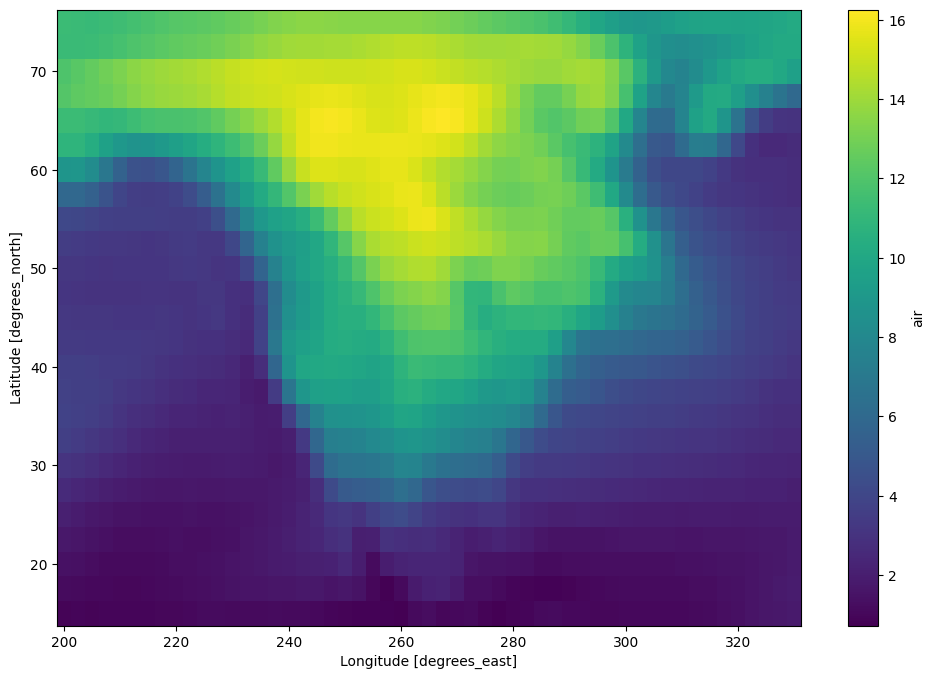

In [12]:
resampled_da.std('time').plot(figsize=(12, 8))

and rolling window operations:

In [13]:
da_smooth = da.rolling(time=30).mean()
da_smooth

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
dask.array<truediv, shape=(2920, 25, 53), dtype=float64, chunksize=(2920, 5, 5), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Since xarray stores each of its coordinate variables in memory, slicing by label is trivial and entirely lazy.

In [14]:
%time da.sel(time='2013-01-01T18:00:00')

CPU times: user 4.12 ms, sys: 890 μs, total: 5.01 ms
Wall time: 4.96 ms


<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
dask.array<getitem, shape=(25, 53), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [15]:
%time da.sel(time='2013-01-01T18:00:00').load()

CPU times: user 31.8 ms, sys: 5.85 ms, total: 37.7 ms
Wall time: 41.6 ms


<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[241.89, 241.8 , 241.8 , ..., 234.39, 235.5 , 237.6 ],
       [246.3 , 245.3 , 244.2 , ..., 230.89, 231.5 , 234.5 ],
       [256.6 , 254.7 , 252.1 , ..., 230.7 , 231.8 , 236.1 ],
       ...,
       [296.6 , 296.4 , 296.  , ..., 296.5 , 295.79, 295.29],
       [297.  , 297.5 , 297.1 , ..., 296.79, 296.6 , 296.29],
       [297.5 , 297.7 , 297.5 , ..., 297.79, 298.  , 297.9 ]],
      shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Custom workflows and automatic parallelization

Almost all of xarray’s built-in operations work on Dask arrays. If you want to use a function that isn’t wrapped by xarray, one option is to extract Dask arrays from xarray objects (.data) and use Dask directly.

Another option is to use xarray’s `apply_ufunc()` function, which can automate embarrassingly parallel “map” type operations where a function written for processing NumPy arrays should be repeatedly applied to xarray objects containing Dask arrays. It works similarly to `dask.array.map_blocks()` and `dask.array.blockwise()`, but without requiring an intermediate layer of abstraction.

Here we show an example using NumPy operations and a fast function from `bottleneck`, which we use to calculate Spearman’s rank-correlation coefficient:

In [16]:
import numpy as np
import xarray as xr
%pip install bottleneck
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

  Using cached bottleneck-1.5.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached bottleneck-1.5.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (362 kB)
Note: you may need to restart the kernel to use updated packages.


In the examples above, we were working with an some air temperature data. For this example, we'll calculate the spearman correlation using the raw air temperature data with the smoothed version that we also created (`da_smooth`). For this, we'll also have to rechunk the data ahead of time.

In [17]:
corr = spearman_correlation(da.chunk({'time': -1}),
                            da_smooth.chunk({'time': -1}),
                            'time')
corr

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
dask.array<transpose, shape=(25, 53), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0

2025-07-02 16:46:33,791 - yprov4wfs - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7fd2169e6030>


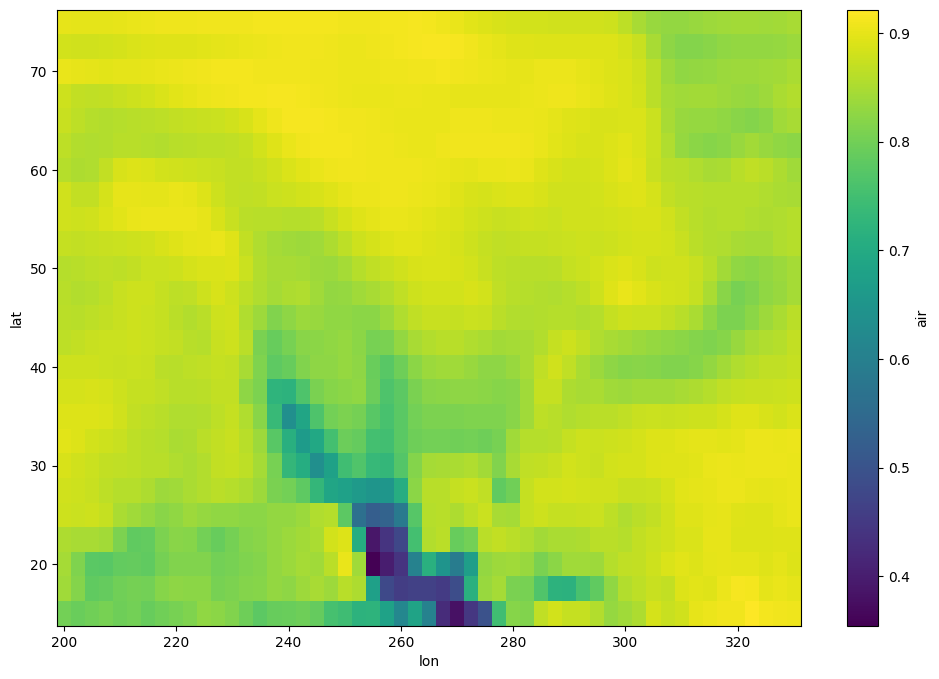

In [18]:
corr.plot(figsize=(12, 8))

In [19]:
client.close()